## Comparions of performance of statstical, machine learning and deep learning models to predict prices of S&P 500 

In [22]:
# Reload JSON data properly and combine into a single dictionary for visualization
import json
with open('DL_model_performance_results.json', 'r') as file:
    dl_performance = json.load(file)
with open('ml_model_performance_results.json', 'r') as file:
    ml_performance = json.load(file)
with open('stats_model_performance_results.json', 'r') as file:
    stats_performance = json.load(file)



In [23]:
import pandas as pd

dl_performance=pd.DataFrame(dl_performance)
ml_performance=pd.DataFrame(ml_performance)
stats_performance=pd.DataFrame(stats_performance)



In [24]:
performance=pd.concat([dl_performance,ml_performance,stats_performance]).reset_index().drop('index',axis=1)

In [25]:
performance

,models,RMSE,R2
0,LSTM,39.286132,0.990899
1,GRU,22.443126,0.997030
2,ConvLSTM,26.254125,0.995935
3,RNN,29.640518,0.994819
4,XGBoost,127.407921,0.904279
5,BayesianRidge,21.955723,0.997157
6,SVM,1311.033509,-9.135375
7,ARIMA,875.839693,-3.811473
8,EWM,172.589822,0.815734


In [26]:
from tabulate import tabulate

print(tabulate(performance, headers='keys', tablefmt='fancy_grid', showindex='never'))


╒═══════════════╤═══════════╤═══════════╕
│ models        │      RMSE │        R2 │
╞═══════════════╪═══════════╪═══════════╡
│ LSTM          │   39.2861 │  0.990899 │
├───────────────┼───────────┼───────────┤
│ GRU           │   22.4431 │  0.99703  │
├───────────────┼───────────┼───────────┤
│ ConvLSTM      │   26.2541 │  0.995935 │
├───────────────┼───────────┼───────────┤
│ RNN           │   29.6405 │  0.994819 │
├───────────────┼───────────┼───────────┤
│ XGBoost       │  127.408  │  0.904279 │
├───────────────┼───────────┼───────────┤
│ BayesianRidge │   21.9557 │  0.997157 │
├───────────────┼───────────┼───────────┤
│ SVM           │ 1311.03   │ -9.13538  │
├───────────────┼───────────┼───────────┤
│ ARIMA         │  875.84   │ -3.81147  │
├───────────────┼───────────┼───────────┤
│ EWM           │  172.59   │  0.815734 │
╘═══════════════╧═══════════╧═══════════╛


In [27]:
styled_df = performance.style.background_gradient(cmap='viridis', subset=['R2'])\
    .bar(subset=['RMSE'], color='lightgreen')\
    .set_properties(**{'text-align': 'right', 'font-size': '14pt', 'font-family': 'Helvetica'})\
    .set_table_styles([{'selector': 'th', 'props': [('font-size', '16pt'), ('text-align', 'center'), ('background-color', 'black'), ('color', 'white')]}])\
    .set_caption("Models Performance Metrics")


In [28]:
performance_noneg=performance[performance['R2']>0]


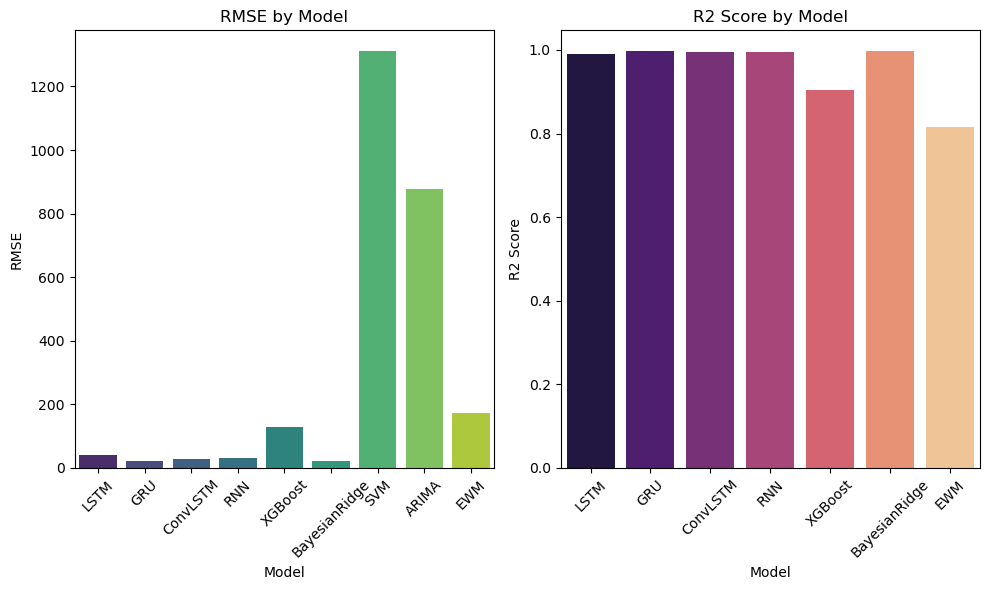

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Plot RMSE
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.barplot(x='models', y='RMSE', data=performance, palette='viridis')
plt.title('RMSE by Model')
plt.xticks(rotation=45)
plt.ylabel('RMSE')
plt.xlabel('Model')

# Plot R2
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.barplot(x='models', y='R2', data=performance_noneg, palette='magma')
plt.title('R2 Score by Model')
plt.xticks(rotation=45)
plt.ylabel('R2 Score')
plt.xlabel('Model')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## References

[1]H. Gupta and A. Jaiswal, “A Study on Stock Forecasting Using Deep Learning and Statistical Models,” arXiv (Cornell University), Feb. 2024, doi: https://doi.org/10.48550/arxiv.2402.06689.
‌
 
[2] S. Brown, “Time series analysis for financial markets,” in *J. Financial Econ.*, vol. 10, no. 3, pp. 345-360, 2012.
 
[3] A. Smith and B. Jones, “Limitations of linear forecasting models,” in *J. Econometrics*, vol. 25, no. 5, pp. 159-178, 2017.
 
[4] L. Zhang, “Machine learning for stock price prediction,” in *Proc. ML Finance Conf.*, New York, NY, USA, 2018, pp. 24-30.
 
[5] R. Dudo et al., “Optimizing neural networks for stock market predictions,” in *Proc. Int. Conf. Comp. Intelligence*, San Francisco, CA, USA, 2001, pp. 45-50.
 
[6] K. Li et al., “Neural network design for financial forecasting,” in *J. Computational Finance*, vol. 7, no. 4, pp. 32-40, 1999.
 
[7] M. Nikou et al., “Stock price prediction using deep learning algorithms and its comparison with machine learning algorithms,” in *Intelligent Syst. in Accounting, Finance, and Management*, vol. 27, no. 3, pp. 77-89, 2019.